I'll try to build a network described in this example using numpy:
https://web.stanford.edu/class/cs224n/readings/gradient-notes.pdf
And maybe try solving MNIST with it. 

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [274]:
def weights_init(m, n):
    layer = np.random.uniform(-1, 1, size=(m,n))
    return layer / np.sqrt(m*n)

In [303]:
def bias_init(m):
    return np.random.uniform(-1, 1, m)

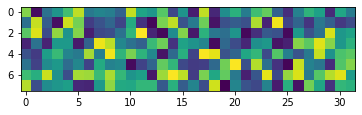

In [324]:
plt.imshow(weights_init(8, 32))

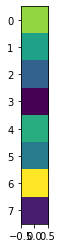

In [326]:
plt.imshow(np.expand_dims(bias_init(8), axis=1))

In [286]:
def softmax(z):
    exps = np.exp(z - np.max(z))
    return exps / np.sum(exps)

In [279]:
def relu(z):
    return np.maximum(z, 0)

In [457]:
def d_relu(z):
    return z > 0 

array([[2, 2, 0],
       [0, 0, 0]])

In [458]:
def cross_entropy(right, wrong):
    return -(right * np.log(wrong)).sum()

In [398]:
x  = np.random.uniform(-1, 1, 784)

W1  = weights_init(128, 784)
b1 = bias_init(128)

l1 = relu(W1 @ x + b1)

W2  = weights_init(10, 128)
b2 = bias_init(10)

l2 = softmax(W2 @ l1 + b2)

"""
lables = ?
cost = cross_entropy(lables, l2)
cross entropy might not work with 2d tensors
"""

'\nlables = ?\ncost = cross_entropy(lables, l2)\ncross entropy might not work with 2d tensors\n'

In [449]:
def fetch(url):
    import requests, gzip, os, hashlib, numpy
    fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            dat = f.read()
    else:
        with open(fp, "wb") as f:
            dat = requests.get(url).content
            f.write(dat)
    return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()

X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]